<a href="https://colab.research.google.com/github/RACHEALJOE545/Health_checkup/blob/main/MACHINE_LEARNING_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
Medic_df = pd.read_csv('/content/insurance (1).csv')

In [3]:
Medic_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Medic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Medic_df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
Medic_df.duplicated().sum()

1

In [7]:
Medic_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
Medic_df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {Medic_df.duplicated().sum()}")

Number of duplicate rows after dropping: 0


In [9]:
Medic_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Encoding**

One-hot Encoder,

Label Encoder,

Mean Encoder,

Target Encoder,

Categorical Encoder etc

In [10]:
Medic_df_1 = Medic_df.copy()

In [11]:
from sklearn.preprocessing import OneHotEncoder

**Initilize your Encoder**

In [12]:
One_hot = OneHotEncoder()


In [13]:
Medic_df_II = Medic_df_1.copy()

In [14]:
Medic_df_1 = pd.get_dummies(Medic_df_1, columns=['sex', 'smoker', 'region'],
                            drop_first = False, dtype = int)

In [15]:
Medic_df_1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [16]:
from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()
Medic_df_II["sex"] = Label_encoder.fit_transform(Medic_df_II["sex"])
Medic_df_II["smoker"] = Label_encoder.fit_transform(Medic_df_II["smoker"])
Medic_df_II["region"] = Label_encoder.fit_transform(Medic_df_II["region"])

Medic_df_II.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


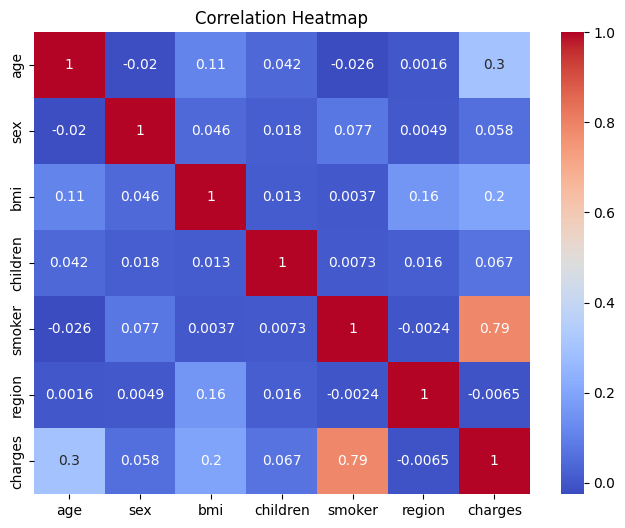

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(Medic_df_II.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
Medic_df_II.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


**MODEL BUILDING**

**Splitting Date**

In [19]:
Medic_df_1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [20]:
### Getting features and target

features = Medic_df_1.drop('charges', axis=1)
target = Medic_df_1['charges']

In [21]:
features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [22]:
target.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


Consider a class of students

1. Example question is the training feature (X_train)
2. Example answer is the training target (Y_train)
3. Classwork question is the test feature (X_test)
4. Classwork answer is the test target (Y_test)

In [23]:
from sklearn.model_selection import train_test_split


**## Split your training and test data in an 80:20 ratio**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 11), (268, 11), (1069,), (268,))

**KNearest Neighbors**

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
### Initialize the model

Knn = KNeighborsRegressor()

## Train your data

Knn.fit(X_train, y_train)

KNeighborsRegressor()

In [27]:
K_pred = Knn.predict(X_test)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [29]:
print(f" mean_squared_error: { mean_squared_error(y_test, K_pred)}")
print(f" mean_absolute_error: { mean_absolute_error(y_test, K_pred)}")
print(f" r2_score: { r2_score(y_test, K_pred)}")

 mean_squared_error: 110380765.63137914
 mean_absolute_error: 6969.493286320149
 r2_score: 0.3438682175864791


In [30]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': K_pred})
compare.reset_index(drop=True, inplace=True)
compare.head()

,Actual,Predicted
0,1633.9618,4367.14518
1,8547.6913,8380.74726
2,9290.1395,15613.24229
3,32548.3405,17521.34570
4,9644.2525,11897.79081


**LINEAR REGRESSION**

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
Lr = LinearRegression()

Lr.fit(X_train, y_train)




LinearRegression()

In [33]:
Lr_pred = Lr.predict(X_test)

print(f" mean_squared_error: { round (mean_squared_error(y_test, Lr_pred), 2)}")
print(f" mean_absolute_error: { round(mean_absolute_error(y_test, Lr_pred), 2)}")
print(f" r2_score: { round (r2_score(y_test, Lr_pred) * 100, 2)}%")

 mean_squared_error: 41546216.66
 mean_absolute_error: 4396.03
 r2_score: 75.3%


**## Overfitting and Underfitting**

In [34]:
Lr.score(X_train, y_train), r2_score(y_test, Lr_pred)

(0.748860461829179, 0.7530385567240124)

In [35]:
Lr_compare = pd.DataFrame({'Actual': y_test, 'Predicted': Lr_pred})
Lr_compare.reset_index(drop=True, inplace=True)
Lr_compare.head()

,Actual,Predicted
0,1633.9618,5119.958800
1,8547.6913,9434.199235
2,9290.1395,11331.692242
3,32548.3405,25966.533106
4,9644.2525,6932.276174


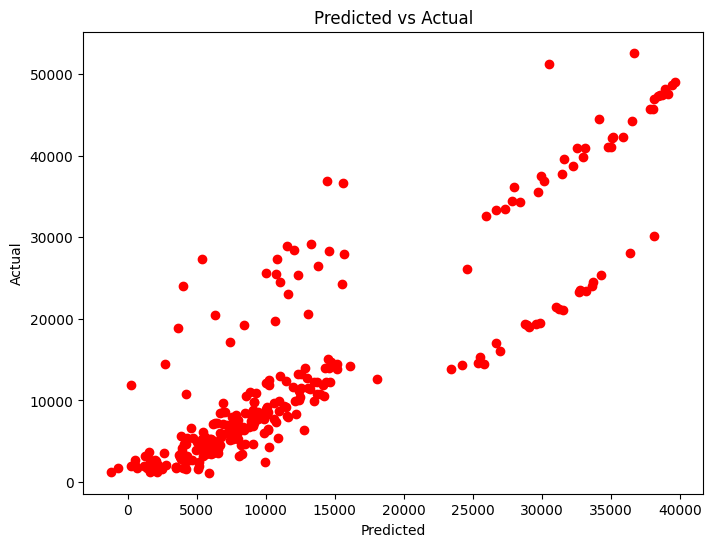

In [36]:

plt.figure(figsize=(8,6))
plt.scatter(Lr_pred, y_test, color='red')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

**Naive Bayes**

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
NB = GaussianNB()

In [40]:
NB.fit(X_train, y_train)

ValueError: Unknown label type: (array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 60021.39897,
       62592.87309, 63770.42801]),)

**Hyper-Parameter Tuning**

**Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [43]:


param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [1, 2, 6],
    'max_features': [2, 4, 6]

}

Dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator= Dtr, param_grid=param, scoring = 'r2', cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 6], 'max_features': [2, 4, 6]},
             scoring='r2', verbose=1)

In [44]:
Dtr = DecisionTreeRegressor()

Dtr.fit(X_train, y_train)
Dtr_pred = Dtr.predict(X_test)

print(f" mean_squared_error: { round (mean_squared_error(y_test, Dtr_pred), 2)}")
print(f" mean_absolute_error: { round(mean_absolute_error(y_test, Dtr_pred), 2)}")
print(f" r2_score: { round (r2_score(y_test, Dtr_pred) * 100, 2)}%")

 mean_squared_error: 52599389.9
 mean_absolute_error: 3664.87
 r2_score: 68.73%


In [45]:
Dtr_compare = pd.DataFrame({'Actual': y_test, 'Predicted': Dtr_pred})
Dtr_compare.reset_index(drop=True, inplace=True)
Dtr_compare.head()

,Actual,Predicted
0,1633.9618,1634.57340
1,8547.6913,10407.08585
2,9290.1395,8964.06055
3,32548.3405,33900.65300
4,9644.2525,9264.79700


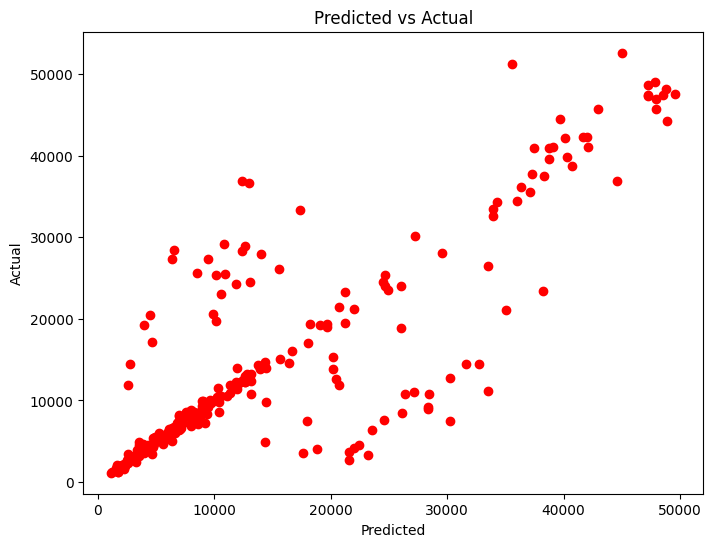

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(Dtr_pred, y_test, color='red')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

**Random Forest**

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
param = {
    'n_estimators': [100, 200, 300],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [1, 2, 6],
    'max_features': [2, 4, 6]

}

Rgr = RandomForestRegressor()

grid_search = GridSearchCV(estimator= Rgr, param_grid=param, scoring = 'r2', cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 6], 'max_features': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [51]:
Rgr = RandomForestRegressor()

Rgr.fit(X_train, y_train)
Rgr_pred = Rgr.predict(X_test)

print(f" mean_squared_error: { round (mean_squared_error(y_test, Rgr_pred), 2)}")
print(f" mean_absolute_error: { round(mean_absolute_error(y_test, Rgr_pred), 2)}")
print(f" r2_score: { round (r2_score(y_test, Rgr_pred) * 100, 2)}%")

 mean_squared_error: 27116052.71
 mean_absolute_error: 2960.17
 r2_score: 83.88%


In [52]:

Rgr_compare = pd.DataFrame({'Actual': y_test, 'Predicted': Rgr_pred})
Rgr_compare.reset_index(drop=True, inplace=True)
Rgr_compare.head()

,Actual,Predicted
0,1633.9618,1878.428174
1,8547.6913,11814.371760
2,9290.1395,9442.593998
3,32548.3405,34155.955318
4,9644.2525,9725.313708


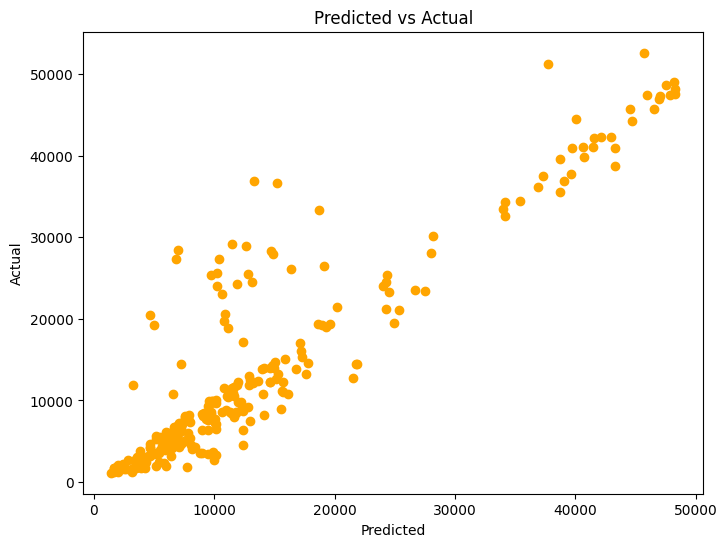

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(Rgr_pred, y_test, color='orange')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

**Feature Engineering**

In [54]:
features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


**Scaling**

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
Dtr.fit(X_train_scaled, y_train)
Dtr_pred = Dtr.predict(X_test_scaled)


In [56]:
print(f" mean_squared_error: { round (mean_squared_error(y_test, Dtr_pred), 2)}")
print(f" mean_absolute_error: { round(mean_absolute_error(y_test, Dtr_pred), 2)}")
print(f" r2_score: { round (r2_score(y_test, Dtr_pred) * 100, 2)}%")

 mean_squared_error: 52599389.9
 mean_absolute_error: 3664.87
 r2_score: 68.73%


**Polynomial Features**

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
PF = PolynomialFeatures(degree=2, interaction_only = False, include_bias = True)
X_poly_train = PF.fit_transform(X_train)
X_poly_test = PF.fit_transform(X_test)


In [61]:
Dtr.fit(X_poly_train, y_train)
Dtr_pred = Dtr.predict(X_poly_test)


In [62]:
print(f" mean_squared_error: { round (mean_squared_error(y_test, Dtr_pred), 2)}")
print(f" mean_absolute_error: { round(mean_absolute_error(y_test, Dtr_pred), 2)}")
print(f" r2_score: { round (r2_score(y_test, Dtr_pred) * 100, 2)}%")

 mean_squared_error: 51807732.42
 mean_absolute_error: 3452.33
 r2_score: 69.2%


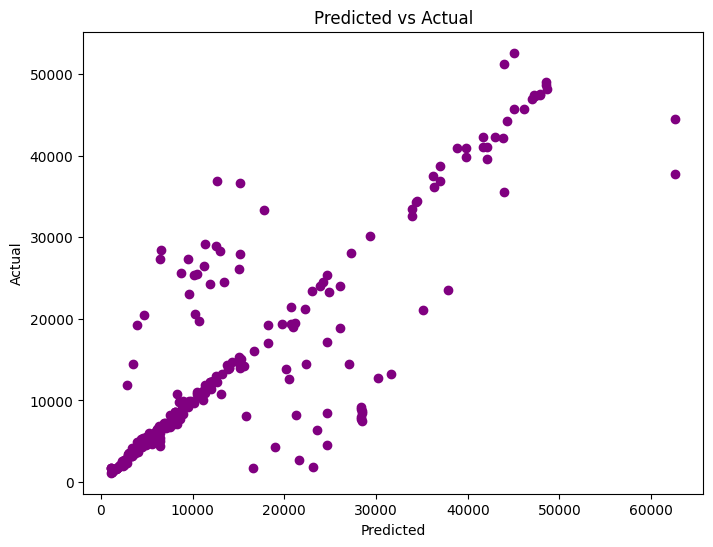

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(Dtr_pred, y_test, color='purple')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

In [64]:
Rgr_compare = pd.DataFrame({'Actual': y_test, 'Predicted': Dtr_pred})
Rgr_compare.reset_index(drop=True, inplace=True)
Rgr_compare.head()

,Actual,Predicted
0,1633.9618,1634.57340
1,8547.6913,8569.86180
2,9290.1395,8964.06055
3,32548.3405,33900.65300
4,9644.2525,9174.13565


**CLASSIFICATION**

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
Claims_df = pd.read_csv('/content/Insurance claims data.csv')

In [67]:
Claims_df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [68]:
Claims_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [69]:
Claims_df.claim_status.value_counts()

,count
claim_status,
0,54844
1,3748


In [70]:
Claims_df.drop('policy_id', axis=1, inplace=True)

**There is class imbalance among the data**

In [71]:
categorical_df = Claims_df.select_dtypes(include=['object']).columns
categorical_series = pd.Series(categorical_df)
print(categorical_series.head())



0    region_code
1        segment
2          model
3      fuel_type
4     max_torque
dtype: object


In [72]:
cat_cols = categorical_series.tolist()
cat_cols

['region_code',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [73]:
from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()

for i in cat_cols:
  Claims_df[i] = Label_encoder.fit_transform(Claims_df[i])

In [74]:
Claims_df.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,0,1,1,1,1,1,1,1,4,0
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,0,1,1,1,0,0,1,1,5,0


**Sorting class imbalance**

In [75]:
Claims_df.claim_status.value_counts()

,count
claim_status,
0,54844
1,3748


In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
sample = Claims_df.sample (frac = 0.2)
sample.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
47019,3.0,4.0,44,21,17804,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
10910,2.8,0.4,44,4,5410,1,9,0,6,3,...,0,1,1,1,0,0,1,1,2,0
8431,12.5,1.4,46,11,27003,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
35443,0.7,0.4,36,15,4076,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
35050,5.6,1.0,36,21,17804,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0


In [78]:
sample.shape

(11718, 40)

In [79]:
sample.claim_status.value_counts()

,count
claim_status,
0,11017
1,701


In [80]:
ros = RandomOverSampler(random_state=12)

In [81]:
x = sample.drop('claim_status', axis=1)
y = sample['claim_status']

In [82]:
X_ros, y_ros = ros.fit_resample(x, y)
X_ros.shape, y_ros.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


((22034, 39), (22034,))

In [83]:
y_ros.value_counts()

,count
claim_status,
0,11017
1,11017


**LOGISTIC REGRESSION**

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.15, random_state=42)


In [86]:
Lg = LogisticRegression()

Lg.fit(x_train, y_train)

Lg_pred = Lg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
Lg.score(x_train, y_train), Lg.score(x_test, y_test)

(0.5690944041008116, 0.5695704779189352)

In [89]:
accuracy_score(y_test, Lg_pred)

0.5695704779189352

In [90]:
Lg_cn = confusion_matrix(y_test, Lg_pred)

In [91]:
Lg_cn

array([[926, 734],
       [689, 957]])

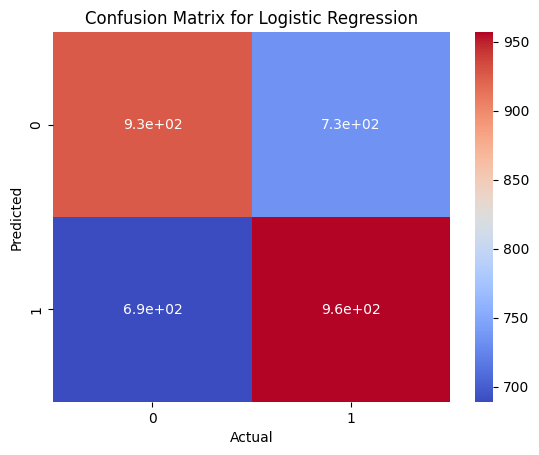

In [92]:
sns.heatmap(Lg_cn, annot=True, cmap='coolwarm')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**DECISION TREE CLASSIFIER**

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
param = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [1, 2, 6],
    'max_features': [2, 4, 6]

}

Dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator= Dtc, param_grid=param, scoring = 'r2', cv=5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 6], 'max_features': [2, 4, 6]},
             scoring='r2', verbose=1)

In [97]:
Dtc = DecisionTreeClassifier()

Dtc.fit(x_train, y_train)
Dtc_pred = Dtc.predict(x_test)
Dtc.score(x_train, y_train), Dtc.score(x_test, y_test)

(0.9996796240922683, 0.9621899576527526)

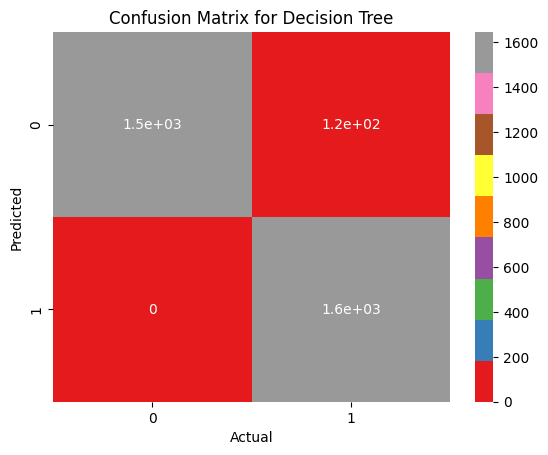

In [101]:
Dtc_cn = confusion_matrix(y_test, Dtc_pred)

sns.heatmap(Dtc_cn, annot=True, cmap='Set1')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [102]:
Dtc_cn

array([[1535,  125],
       [   0, 1646]])